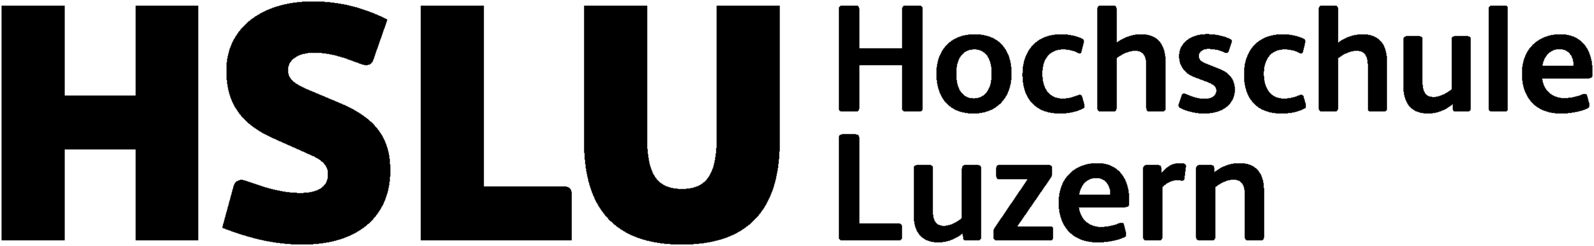

### Project No Sql

### Dogs & Cats database


**Julio Cortes**

**2025**

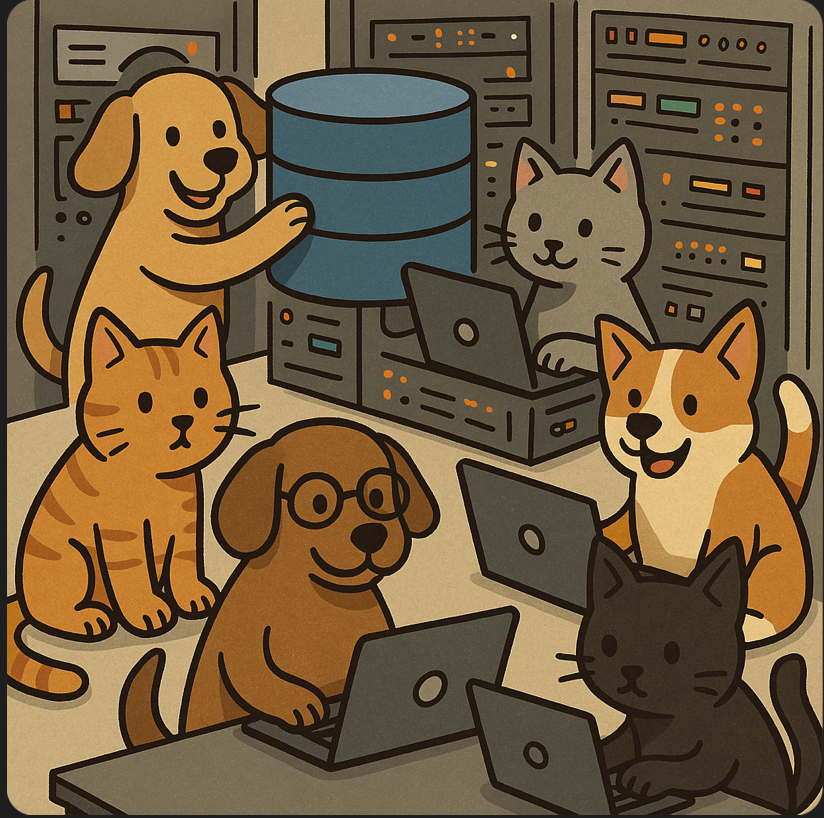
**Image generated with Chatgpt**

## Table of Contents

1. [Project NoSQL](#project-no-sql)
2. [Dogs & Cats Database](#dogs--cats-database)
3. [API & NoSQL Project: Cat and Dog Data](#api--nosql-project-cat-and-dog-data)
   - [Key Concepts](#key-concepts)
   - [Outcome](#outcome)
   - [Dog Data Extraction Overview](#dog-data-extraction-overview)
4. [NoSQL Schema Description – Pets DB](#nosql-schema-description--pets-db)
   - [Structure Overview](#structure-overview)
   - [Why This Design?](#why-this-design)
5. [Collections Creations](#collections-creations)
   - [Fixing Inconsistencies in `life_span` Values](#fixing-inconsistencies-in-life_span-values)
6. [Transformation](#transformation)
   - [Adding Geo Coordinates to `type_dogs` & `type_cats`](#adding-geo-coordinates-to-typedogs--typecats)
   - [Action](#action)
   - [Source of Extracting Geo Coordinates](#source-of-extracting-geo-coordinates)
   - [How It's Done](#how-its-done)
   - [Extracting origin from `type_cats` and adding coordinates](#extracting-origin-from-type_cats-and-adding-coordinates)
   - [Selected Columns Overview](#selection-of-specific-columns-for-better-understanding-of-dataset)
7. [Data Analysis](#data-analysis)
   - [Dogs Database Collection](#dogs-database-collection)
   - [Intelligent Dog Breeds in the Sporting Group](#intelligent-dog-breeds-in-the-sporting-group)
     - [Pipeline Breakdown](#pipeline-breakdown)
     - [Output](#output)
   - [Filtered List of Intelligent Sporting Breeds](#filtered-list-of-intelligent-sporting-breeds-excluding-lapdogs)
     - [Pipeline Breakdown](#pipeline-breakdown)
     - [Output](#output)
   - [Top 10 Tallest Dog Breeds](#top-10-tallest-dog-breeds-by-average-metric-height)
     - [Pipeline Breakdown](#pipeline-breakdown)
     - [Output](#output)
   - [Average Metric Weight by Dog Breed](#average-metric-weight-by-dog-breed)
     - [Pipeline Breakdown](#pipeline-breakdown)
   - [Longevity Analysis of Dog Breeds](#longevity-analysis-dog-breeds-with-long-life-expectancy)
     - [Pipeline Breakdown](#pipeline-breakdown)
     - [Result](#result)
   - [Breed Group Distribution](#breed-group-distribution)
     - [Pipeline Steps](#pipeline-steps)
     - [Result](#result)
   - [Cat Breeds by Geographic Origin](#visualization-cat-breeds-by-geographic-origin)
     - [Steps Involved](#steps-involved)
     - [Outcome](#outcome)
   - [Origin Distribution of Cat Breeds](#origin-distribution-of-cat-breeds)
     - [Pipeline Breakdown](#pipeline-breakdown)
     - [Result](#result)
   - [Top 10 Longest-Living Cat and Dog Breeds](#top-10-longest-living-cat-and-dog-breeds)
8. [Conclusion](#conclusion)
9. [Learning](#learning)


## 🐾 API & NoSQL Project: Cat and Dog Data

This beginner-friendly project connects to a **public API** to collect data on **cats and dogs**, including:
- 🐶 Breed names
- 🧠 Temperament traits
- 🧬 Other characteristics

The data is stored in a **MongoDB** NoSQL database.

### 💡 Key Concepts
- API requests and JSON handling
- NoSQL data modeling with MongoDB
- Aggregation and querying unstructured data

### 🚀 Outcome
Build a solid foundation in **API integration** and **NoSQL storage**, essential for backend and data-driven applications.


Requirements & Configuration

In [65]:
import pymongo
import pprint as pp
import pandas as pd
import requests
import json
import time
import string
import re
import matplotlib.pyplot as plt
import numpy as np


In [66]:
# API and Database details
API_URL_1 = "https://api.thedogapi.com/v1/breeds"
API_URL_2 = "https://api.thecatapi.com/v1/breeds"
DOG_API_KEY = "live_zxfLgASbdmoVWuJ3PZSm5dUrrsuoaJMV0YnoCVlporMq4ijHVnQpkiZQXegC8BYv"  
CAT_API_KEY = "live_MEzvYHLqnt7f6Wi1URvxHttSq8MFuh2s0fLZTAVsqJ1IGZRA0R8eUknafoFDm0Xc"  
CNX_STR = "localhost:27017"
DB_NAME_1 = "dogsdb"
DB_NAME_2 = "catsdb"
DB_NAME_3 = "petsdb"
COLL_NAME_1 = "type_dogs"
COLL_NAME_2 = "type_cats"
COLL_NAME_3 = "type_pets"



ELT Process
DB Setup

In [67]:
# connection to MongoDB
client = pymongo.MongoClient(CNX_STR)
#dogs database 
db_1 = client[DB_NAME_1]
dogs = db_1[COLL_NAME_1]

#cats databse
db_2 = client[DB_NAME_2]
cats = db_2[COLL_NAME_2]

#Pets Database
db_3 = client[DB_NAME_3]
pets = db_3[COLL_NAME_3]

In [68]:
# Remove all existing collection 
cats.drop()
dogs.drop()
pets.drop()

client.drop_database("petsdb")
client.drop_database("catsdb")
client.drop_database("dog_database")
client.drop_database("cat_database")

Extract & find a document

In [69]:
# download all dog breeds 
url = f'{API_URL_1}?f='
headers = {"x-api-key": DOG_API_KEY}
response = requests.get(url, headers=0)
dog = response.json()




In [70]:
# inspect first dog
sample_dog = dog[0]  # This accesses the first element in the list.
pp.pprint(sample_dog)


{'bred_for': 'Small rodent hunting, lapdog',
 'breed_group': 'Toy',
 'height': {'imperial': '9 - 11.5', 'metric': '23 - 29'},
 'id': 1,
 'life_span': '10 - 12 years',
 'name': 'Affenpinscher',
 'origin': 'Germany, France',
 'reference_image_id': 'BJa4kxc4X',
 'temperament': 'Stubborn, Curious, Playful, Adventurous, Active, Fun-loving',
 'weight': {'imperial': '6 - 13', 'metric': '3 - 6'}}


In [71]:
# download all cat breeds 
url = f'{API_URL_2}?f='
headers = {"x-api-key": CAT_API_KEY}
response = requests.get(url, headers=0)
cat = response.json()




In [72]:
# inspect first cat
sample_cat = cat[0]  # This accesses the first element in the list.
pp.pprint(sample_cat)

{'adaptability': 5,
 'affection_level': 5,
 'alt_names': '',
 'cfa_url': 'http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx',
 'child_friendly': 3,
 'country_code': 'EG',
 'country_codes': 'EG',
 'description': 'The Abyssinian is easy to care for, and a joy to have in your '
                'home. They’re affectionate cats and love both people and '
                'other animals.',
 'dog_friendly': 4,
 'energy_level': 5,
 'experimental': 0,
 'grooming': 1,
 'hairless': 0,
 'health_issues': 2,
 'hypoallergenic': 0,
 'id': 'abys',
 'indoor': 0,
 'intelligence': 5,
 'lap': 1,
 'life_span': '14 - 15',
 'name': 'Abyssinian',
 'natural': 1,
 'origin': 'Egypt',
 'rare': 0,
 'reference_image_id': '0XYvRd7oD',
 'rex': 0,
 'shedding_level': 2,
 'short_legs': 0,
 'social_needs': 5,
 'stranger_friendly': 5,
 'suppressed_tail': 0,
 'temperament': 'Active, Energetic, Independent, Intelligent, Gentle',
 'vcahospitals_url': 'https://vcahospitals.com/know-your-pet/cat-breeds/abyssinian',
 'vetstreet_url'

### 🐶 Dog Data Extraction Overview

This function extracts and cleans relevant dog breed information from raw JSON data. It includes:

- **Breed details** (`id`, `name`, `origin`, `breed_group`, etc.)
- **Structured `temperament` and `origin`** lists
- **Cleaned `life_span`** string, ensuring format consistency (e.g. `1214` → `12-14`)
- **Full `weight` and `height`** dictionaries (if available)

> ⚙️ Includes logic to fix malformed life spans with missing hyphens.


In [73]:
import re
import pandas as pd

def extract_dog_values(dog, user_column_value='dog'):
    raw_life_span = dog.get('life_span', '')
    # Clean life_span: remove unwanted characters
    cleaned = re.sub(r'[^0-9\-]', '', raw_life_span).strip()
    
    # Detect and correct patterns like "81-5" or "91-4" using regex.
    match = re.fullmatch(r'(\d{2})-(\d)$', cleaned)
    if match:
        first, second = match.groups()
        # Correcting the pattern where the life span seems broken into "XX-X" format
        cleaned = f"{first}-{second}"
    elif '-' not in cleaned:
        # If no hyphen is found, try to insert one based on the length of the string.
        if len(cleaned) == 4:
            cleaned = cleaned[:2] + '-' + cleaned[2:]
        elif len(cleaned) == 3:
            cleaned = cleaned[:2] + '-' + cleaned[2:]
        elif 0 < len(cleaned) <= 2:
            cleaned = f"{cleaned}-{cleaned}"
    
    filtered_life_span = cleaned

    raw_origin = dog.get('origin', None)
    if isinstance(raw_origin, str):
        origin_list = [o.strip() for o in raw_origin.split(',')]
    elif isinstance(raw_origin, list):
        origin_list = raw_origin
    else:
        origin_list = []

    raw_temperament = dog.get('temperament', '')
    if isinstance(raw_temperament, str):
        temperament_list = [t.strip() for t in raw_temperament.split(',')]
    else:
        temperament_list = []

    values = {
        'id': dog.get('id'),
        'type_of_pet': user_column_value,
        'breed': dog.get('name', ''),
        'origin': origin_list,
        'country_code': dog.get('country_code', ''),
        'life_span': filtered_life_span,
        'temperament': temperament_list,
        'weight': dog.get('weight', ''),
        'height': dog.get('height', ''),
        'bred_for': dog.get('bred_for', ''),
        'breed_group': dog.get('breed_group', '')
    }
    return values


In [74]:
def extract_cat_values(cat, user_column_value='cat'):
    """
    Extracts cat breed information into a dictionary and includes a user-supplied column if provided.

    :param cat: A dictionary containing cat data.
    :param user_column_value: Optional user-supplied data for the new_column field.
    :return: A dictionary representing a cat document.
    """

    # Process origin
    raw_origin = cat.get('origin', '')
    if isinstance(raw_origin, str):
        origin_list = [o.strip() for o in raw_origin.split(',')] if raw_origin else []
    elif isinstance(raw_origin, list):
        origin_list = raw_origin
    else:
        origin_list = []

    # Process country_code
    raw_country_code = cat.get('country_code', '')
    if isinstance(raw_country_code, str):
        country_code_list = [c.strip() for c in raw_country_code.split(',')] if raw_country_code else []
    elif isinstance(raw_country_code, list):
        country_code_list = raw_country_code
    else:
        country_code_list = []

    # Process temperament
    raw_temperament = cat.get('temperament', '')
    if isinstance(raw_temperament, str):
        temperament_list = [t.strip() for t in raw_temperament.split(',')] if raw_temperament else []
    elif isinstance(raw_temperament, list):
        temperament_list = raw_temperament
    else:
        temperament_list = []

    values = {
        'id': cat.get('id', ''),
        'type_of_pet': user_column_value,
        'breed': cat.get('name', ''),
        'origin': origin_list,
        'country_code': country_code_list,
        'life_span': cat.get('life_span', ''),
        'temperament': temperament_list,
        'weight': cat.get('weight', ''),  # Changed here: no longer accessing ['metric']
        'description': cat.get('description', ''),
        'affection_level': cat.get('affection_level', ''),
        'energy_level': cat.get('energy_level', ''),
        'dog_friendly': cat.get('dog_friendly', ''),
        'child_friendly': cat.get('child_friendly', ''),
        'intelligence': cat.get('intelligence', ''),
        'hairless': cat.get('hairless', ''),
        'health_issues': cat.get('health_issues', ''),
        'hypoallergenic': cat.get('hypoallergenic', ''),
        'experimental': cat.get('experimental', ''),
        'indoor': cat.get('indoor', ''),
        'natural': cat.get('natural', ''),
        'rare': cat.get('rare', ''),
        'shedding_level': cat.get('shedding_level', ''),
        'social_needs': cat.get('social_needs', ''),
        'stranger_friendly': cat.get('stranger_friendly', '')
    }

    # Print the key-value pairs in vertical format for debugging/display
    for key, value in values.items():
        print(f"{key}: {value}")

    return values


In [75]:
# generate list of characters including digits
list_characters = [char for char in string.ascii_lowercase + string.digits]
print(list_characters)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [76]:
# Initialize an empty list and a set to track unique dog IDs
list_dogs = []
seen_dog_ids = set()

# Download/search dogs by starting char
for i, char in enumerate(list_characters):
    print(f'- {char} ({i+1}/{len(list_characters)})', end='\r')
    url = f'{API_URL_1}?f={char}'
    r = requests.get(url)
    data = r.json()

    if data:  # If there's data, proceed to extract values
        for dog in data:
            dog_id = dog.get('id')
            if dog_id not in seen_dog_ids:
                values = extract_dog_values(dog)
                list_dogs.append(values)
                seen_dog_ids.add(dog_id)  # Add dog ID to the set to track it
                
    time.sleep(1)  # Throttle requests to avoid being rate-limited


- 9 (36/36)

In [ ]:
# Initialize an empty list and a set to track unique cats IDs
list_cats = []
seen_cats_ids = set()

# Download/search cats by starting char
for i, char in enumerate(list_characters):
    print(f'- {char} ({i+1}/{len(list_characters)})', end='\r')
    url = f'{API_URL_2}?f={char}'
    r = requests.get(url)
    data = r.json()

    if data:  # If there's data, proceed to extract values
        for cat in data:
            cat_id = cat.get('id')
            if cat_id not in seen_cats_ids:
                values = extract_cat_values(cat)
                list_cats.append(values)
                seen_cats_ids.add(cat_id)  # Add cat ID to the set to track it
                
    time.sleep(1)  # Throttle requests to avoid being rate-limited


id: abys6)
type_of_pet: cat
breed: Abyssinian
origin: ['Egypt']
country_code: ['EG']
life_span: 14 - 15
temperament: ['Active', 'Energetic', 'Independent', 'Intelligent', 'Gentle']
weight: {'imperial': '7  -  10', 'metric': '3 - 5'}
description: The Abyssinian is easy to care for, and a joy to have in your home. They’re affectionate cats and love both people and other animals.
affection_level: 5
energy_level: 5
dog_friendly: 4
child_friendly: 3
intelligence: 5
hairless: 0
health_issues: 2
hypoallergenic: 0
experimental: 0
indoor: 0
natural: 1
rare: 0
shedding_level: 2
social_needs: 5
stranger_friendly: 5
id: aege
type_of_pet: cat
breed: Aegean
origin: ['Greece']
country_code: ['GR']
life_span: 9 - 12
temperament: ['Affectionate', 'Social', 'Intelligent', 'Playful', 'Active']
weight: {'imperial': '7 - 10', 'metric': '3 - 5'}
description: Native to the Greek islands known as the Cyclades in the Aegean Sea, these are natural cats, meaning they developed without humans getting involved in 

## 📦 NoSQL Schema Description – Pets DB

This NoSQL schema is designed to organize and store structured pet data — specifically for **cats and dogs** — using a **document-based model** ideal for MongoDB.

### 🗂️ Structure Overview

- **`pets` collection**  
  Serves as the central entry point. Each document includes a unique `_id` and a `type_of_pet` field (e.g., `"cat"` or `"dog"`).

- **`cats` collection**  
  Linked by `_id`, each document includes:
  - `breed`
  - `affection_level`, `intelligence`, `friendliness`
  - Physical traits like `hairless`, `hypoallergenic`, `weight`

- **`dogs` collection**  
  Also linked by `_id`, each document includes:
  - `breed`
  - `bred_for` (purpose of breed origin)
  - `weight`, `height`, `temperament`, and `breed_group`

### 🔍 Why This Design?
- Keeps pet types cleanly separated while still linked
- Supports flexible, schema-less attributes per animal type
- Ideal for querying pets by type or specific traits
- Great for learning **NoSQL modeling** and working with real-world **API data**


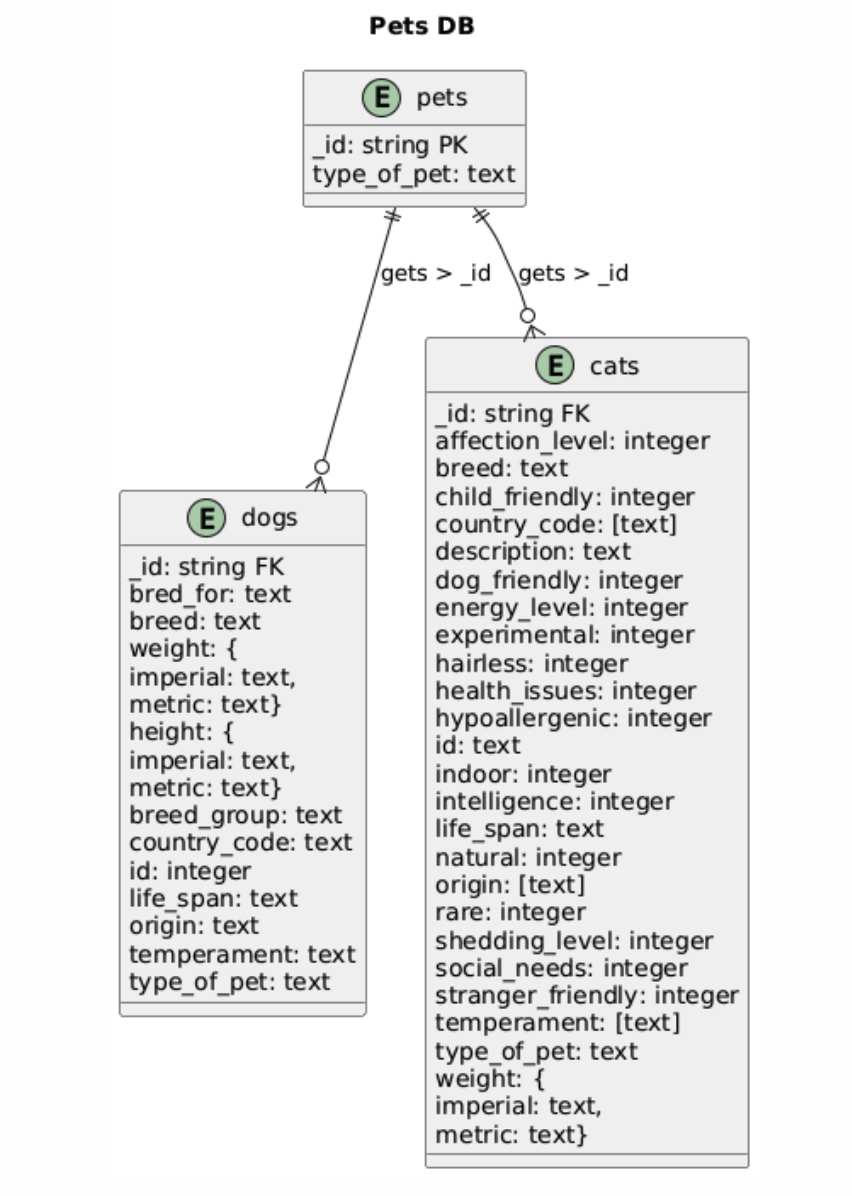 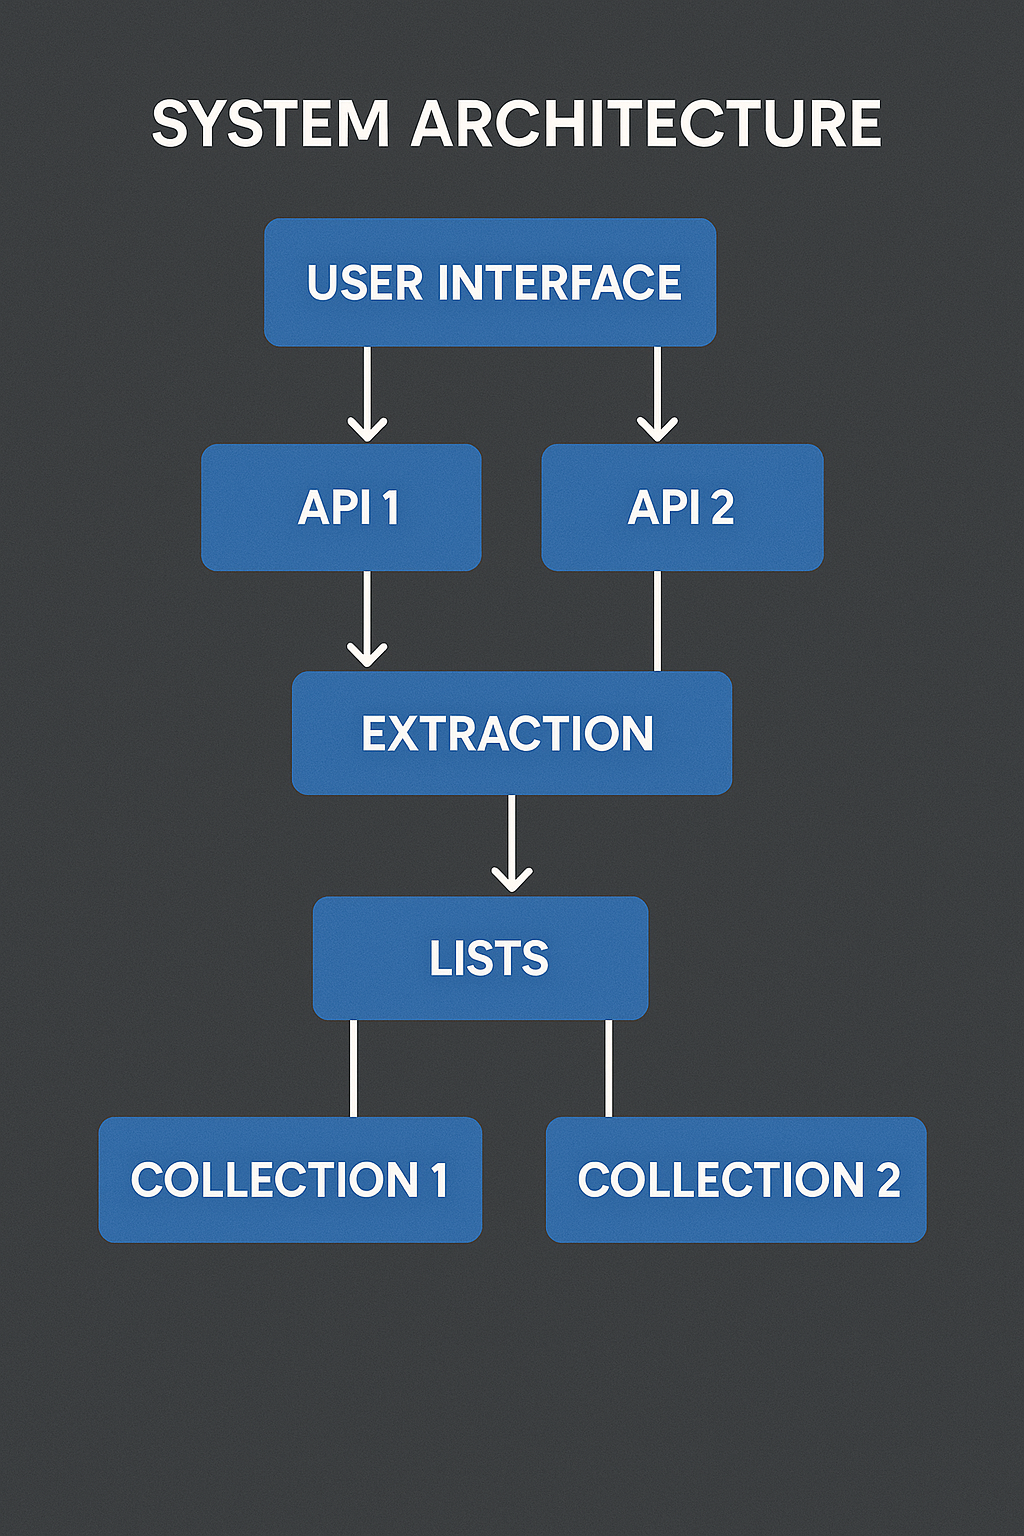

# Collections creations

In [ ]:
# insert the list of dogs (=documents) into MongoDB collection "dogs"
dogs.insert_many(list_dogs);


In [ ]:
# count number of documents inserted
dogs.count_documents({})

In [ ]:
# insert the list of cats (=documents) into MongoDB collection "cats"
cats.insert_many(list_cats);

In [ ]:
# count number of documents inserted into cats
print(cats.count_documents({}))


In [ ]:
# insert the list of cats & dogs (=documents) into MongoDB collection "pets"
pets.insert_many(list_dogs);
pets.insert_many(list_cats);

In [ ]:
# count number of documents inserted into pets
print(pets.count_documents({}))

In [ ]:
# Dictionary to store database and collection info
all_collections = []

# Iterate over all databases
for db_name in client.list_database_names():
    db = client[db_name]
    for coll_name in db.list_collection_names():
        all_collections.append({"database": db_name, "collection": coll_name})

# Convert to DataFrame
colls_df = pd.DataFrame(all_collections)
print(colls_df)

In [ ]:
colls = pd.DataFrame(client['catsdb'].list_collection_names(), columns=["collection"])
colls

In [ ]:
colls = pd.DataFrame(client['dogsdb'].list_collection_names(), columns=["collection"])
colls

In [ ]:
colls = pd.DataFrame(client['petsdb'].list_collection_names(), columns=["collection"])
colls

In [ ]:
# get one dog from MongoDB
(dogs.find_one())


In [ ]:
# get 5 dogs from MongoDB and display as datframe
r = dogs.aggregate([
      {"$limit": 5},
])

pd.DataFrame(r)


## ✅ Fixing Inconsistencies in `life_span` Values

Inconsistencies were found in the `life_span` field of the `pets_collection`. The values `81-5` and `91-4` were incorrectly formatted. These were corrected as follows:

- `81-5` was updated to `8-15`
- `91-4` was updated to `9-14`

The issue was resolved using the `update_many` function in MongoDB to ensure a consistent format for the lifespan values_


In [ ]:
db = client["dogsdb"]
pets_collection = db["type_dogs"]

# Update the "life_span" field in the collection to fix the ranges
pets_collection.update_many(
    {"life_span": "81-5"},  # Condition to find the incorrect value
    {"$set": {"life_span": "8-15"}}  # Update to the corrected value
)

pets_collection.update_many(
    {"life_span": "91-4"},  # Condition to find the incorrect value
    {"$set": {"life_span": "9-14"}}  # Update to the corrected value
)

# Verify the update by printing the distinct "life_span" values
updated_life_spans = pets_collection.distinct("life_span")
print(updated_life_spans)


In [ ]:
# check collection structure
r = cats.aggregate([
    {"$project": {"_id": 0}},
    {"$limit": 5},
])
pd.DataFrame(r)

In [ ]:
# List databases
client.list_database_names()

Transform 

In [ ]:
# selection of specific columns of interest 
r = dogs.aggregate([
  {"$limit": 10},
  {
    "$project": {
      "_id": 0,
      "type_of_pet": 1,
      "breed": 1,
      "country_code": 1,
      "origin": 1,
      "life_span": 1,
      "weight": 1,
      "temperament":2,
    }
  }
])

filtered_pet = pd.DataFrame(r)
filtered_pet


# 🔄 Transformation

## 🌍 Adding Geo Coordinates to `type_dogs` & `type_cats`

Geo location data is added to both collections using the `$set` operator with `updateMany`.

### 🛠️ Action:
- A new field `geocord` (geo coordinates) is added to all documents in:
  - `type_dogs`
  - `type_cats`

This allows for future geospatial queries and visualizations, improving data usability for mapping or location-based features.


In [ ]:

db = client["dogsdb"]
pets_collection = db["type_dogs"]  

# Add a new field "geocord" to every document
result = pets_collection.update_many(
    {},
    {"$set": {"geocord":""}}
)

print(f"Modified {result.modified_count} documents.")

Adding fields via Update many via set

In [ ]:

db = client["catsdb"]
pets_collection = db["type_cats"]  # or whichever collection name you use

# Add a new field "geocord" to every document
result = pets_collection.update_many(
    {},
    {"$set": {"geocord":""}}
)

print(f"Modified {result.modified_count} documents.")

We check the new column 

In [ ]:
db = client["dogsdb"]
pets_collection = db["type_dogs"]

# Fetch a document to check (for example, the first one)
doc = pets_collection.find_one({})
pp.pprint(doc)

In [ ]:
db = client["catsdb"]
pets_collection = db["type_cats"]

# Fetch a document to check (for example, the first one)
doc = pets_collection.find_one({})
pp.pprint(doc)

### 🌐 Source of Extracting Geo Coordinates

Geo coordinates are derived based on each pet’s country of origin.

#### 🗺️ How It's Done:
- The `origin` field (e.g., `"Germany"`, `"France"`) is used as a reference.
- A separate dataset or API (such as openstreetmap) provides latitude and longitude for each country.
- These coordinates are mapped and inserted into the `geocord` field in both `type_dogs` and `type_cats`.

This enriches the dataset for future use in **geospatial analysis** or **map visualizations**.


In [ ]:

url = "https://nominatim.openstreetmap.org/search"
params = {
    'country': 'Germany',
    'format': 'json'
}
headers = {
    'User-Agent': 'MyAwesomeApp/1.0 (myemail@example.com)'
}

response = requests.get(url, params=params, headers=headers)
data = response.json()

pp.pprint(data)

Extracting origin from from type_dogs collection, and adding coordinates to empty column 'geocord' 

In [ ]:
import time
import requests

db = client["dogsdb"]
collection = db["type_dogs"]

for pet in collection.find():
    origin_field = pet.get("origin")

    # Skip if origin is missing
    if not origin_field:
        continue

    # Normalize origin to a string: take the first item if it's a list
    if isinstance(origin_field, list) and origin_field:
        origin_value = origin_field[0]
    elif isinstance(origin_field, str):
        origin_value = origin_field.split(",")[0].strip()
    else:
        # Unsupported format
        continue

    # Skip if the value is "Unknown"
    if origin_value.strip().lower() == "N/A":
        continue

    # Prepare the request to Nominatim
    url = "https://nominatim.openstreetmap.org/search"
    params = {
        "country": origin_value,
        "format": "json"
    }
    headers = {
        "User-Agent": "MyAwesomeApp/1.0 (myemail@example.com)"
    }

    try:
        response = requests.get(url, params=params, headers=headers, timeout=10)
        response.raise_for_status()
        data = response.json()
    except requests.RequestException as e:
        print(f"Request failed for origin '{origin_value}': {e}")
        continue

    if data:
        try:
            lat = float(data[0].get("lat", 0))
            lon = float(data[0].get("lon", 0))

            result = collection.update_one(
                {"_id": pet["_id"]},
                {"$set": {"geocord": {"lat": lat, "lon": lon}}}
            )

            if result.matched_count > 0:
                print(f"Updated doc _id={pet['_id']} with lat={lat}, lon={lon}")
            else:
                print(f"No document matched for _id={pet['_id']}")
        except (ValueError, KeyError) as e:
            print(f"Failed to parse lat/lon for origin '{origin_value}': {e}")
    else:
        print(f"No results for origin '{origin_value}'")

    time.sleep(1)

# Confirm an example update
check_pet = collection.find_one({"_id": pet["_id"]})
print("Example updated pet with geocord:", check_pet.get("geocord"))


We check the results 

In [ ]:
# Query documents that have a 'geocord' field
updated_docs = collection.find({"geocord": {"$exists": True}})

for doc in updated_docs:
    pp.pprint(doc)

Selection of specific columns for better understanding of dataset 

In [ ]:
db = client["dogsdb"]
collection = db["type_dogs"]

# Query the collection with a projection and limit to 5 results
cursor = collection.find(
    {}, 
    {
        "_id": 0,
        "type_of_pet": 1,
        "breed": 1,
        "country_code": 1,
        "origin": 1,
        "geocord": 1,
        "life_span": 1,
        "weight": 1,
        "temperament": 1,
        "height": 1,
        "breed_group": 1
    }
).limit(10)

# Convert the cursor to a list, then create a DataFrame
data = list(cursor)
df = pd.DataFrame(data)
df



In [ ]:
db = client["catsdb"]
collection = db["type_cats"]

for pet in collection.find():
    origin_field = pet.get("origin")

    if not origin_field:
        # Skip documents with no origin
        continue

    # If origin is a single string but may contain commas, split on the first comma
    if isinstance(origin_field, str):
        origin_field = origin_field.split(",")[0].strip()

    # Query Nominatim for just this first origin
    url = "https://nominatim.openstreetmap.org/search"
    params = {
        "country": origin_field,
        "format": "json"
    }
    headers = {
        "User-Agent": "MyAwesomeApp/1.0 (myemail@example.com)"
    }

    try:
        response = requests.get(url, params=params, headers=headers, timeout=10)
        response.raise_for_status()
        data = response.json()
    except requests.RequestException as e:
        print(f"Request failed for origin '{origin_field}': {e}")
        continue

    # Update if the data list is not empty
    if data:
        try:
            lat = float(data[0].get("lat", 0))
            lon = float(data[0].get("lon", 0))

            result = collection.update_one(
                {"_id": pet["_id"]},
                {"$set": {"geocord": {"lat": lat, "lon": lon}}}
            )

            if result.matched_count > 0:
                print(f"Updated doc _id={pet['_id']} with lat={lat}, lon={lon}")
            else:
                print(f"No document matched for _id={pet['_id']}")
        except (ValueError, KeyError) as e:
            print(f"Failed to parse lat/lon for origin '{origin_field}': {e}")
    else:
        print(f"No results for origin '{origin_field}'")

    time.sleep(1)

# Optional: Confirm an example
check_pet = collection.find_one({"_id": pet["_id"]})
print("Example updated pet with geocord:", check_pet.get("geocord"))


### Extracting origin from from type_cats collection, and adding coordinates to empty column 'geocord' 

### Selection of specific columns for better understanding of dataset 

In [ ]:
db = client["catsdb"]
collection = db["type_cats"]

# Query the collection with a projection
pipeline = collection.find(
    {}, 
    {
        "_id": 0,
        "type_of_pet": 1,
        "breed": 1,
        "country_code": 1,
        "origin": 1,
        "geocord": 1,
        "life_span": 1,
        "weight": 1,
        "temperament": 1
    }
).limit(5)

# Convert the pipeline to a list, then create a DataFrame
data = list(pipeline)
df = pd.DataFrame(data)
df


## 📊 Data Analysis  
### 🐶 Dogs Database Collection

This section explores and analyzes the data stored in the `type_dogs` collection.

Key areas of focus include:
- Breed distribution
- Temperament traits
- Height and weight analysis
- Breed group statistics
- Geographic origin insights

Using aggregation pipelines and visualizations, we extract meaningful patterns and trends from the dataset.


To get the unique values of breed_group from your MongoDB collection, we can use the .distinct() method in PyMongo

## 🧠 Intelligent Dog Breeds in the Sporting Group

This MongoDB aggregation pipeline retrieves dog breeds that are part of the **Sporting group** and have the **"Intelligent"** temperament.

### 🧩 Pipeline Breakdown

1. **`$match`**
   - Filters documents to include only those where:
     - `"breed_group"` is `"Sporting"`
     - `"temperament"` array contains the string `"Intelligent"`

2. **`$project`**
   - Returns only selected fields:
     - `breed`
     - `breed_group`
     - `temperament`
   - Excludes the default `_id` field from the output.

### 📋 Output
The result is a list of breeds that:
- Belong to the **Sporting group**, which includes active and energetic breeds often used for hunting or retrieving.
- Are described as **Intelligent**, suggesting quick learning and trainability.

This filtered list is useful for identifying smart, athletic dog breeds suited for active owners or working roles.


In [ ]:
import pandas as pd

db = client["dogsdb"]
collection = db["type_dogs"]

pipeline = [
    {
        "$match": {
            "breed_group": "Sporting",
            "temperament": { "$regex": "Intelligent", "$options": "i" }
        }
    },
    {
        "$project": {
            "_id": 0,
            "breed_group": 1,
            "breed": 1,
            "temperament": 1
        }
    }
]

# Execute the aggregation pipeline
results = list(collection.aggregate(pipeline))
df1 = pd.DataFrame(results)
df1.head(6)


In [ ]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

# Convert the results to a DataFrame
df1 = pd.DataFrame(results)

# Combine all breed names into a single string, separated by space
text = " ".join(df1['breed'].dropna().tolist())

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Intelligent Breed Group Sporting')
plt.show()


## 🎯 Filtered List of Intelligent Sporting Breeds (Excluding Lapdogs)

This MongoDB aggregation pipeline is used to filter and display **Sporting dog breeds** that are known for being **Intelligent**, while specifically **excluding those bred to be lapdogs**.

### 🔍 Pipeline Breakdown

1. **`$match`**
   - Filters documents where:
     - `breed_group` is `"Sporting"`
     - `temperament` includes `"Intelligent"` (searches within the array)
     - `bred_for` **does not contain** the word `"lapdog"` (case-insensitive exclusion using `$not` with `$regex`)

2. **`$project`**
   - Selects and returns only the following fields:
     - `breed`
     - `breed_group`
     - `temperament`
     - `bred_for`
   - Omits the default `_id` field from the output.

### 📋 Output
The result is a curated list of breeds that:
- Belong to the **Sporting group**  
- Are described as **Intelligent**  
- Were **not bred to be lapdogs**

This helps narrow down active, intelligent breeds that are typically used for tasks like hunting, retrieving, or field work — not just companionship.



In [ ]:
import pandas as pd

db = client["dogsdb"]
pets_collection = db["type_dogs"]

# Aggregation pipeline
pipeline = [
    {
        "$match": {
            "breed_group": "Sporting",
            "temperament": "Intelligent",
            "bred_for": {
                "$not": {
                    "$regex": "lapdog",
                    "$options": "i"  
                }
            }
        }
    },
    {
        "$project": {
            "_id": 0,
            "breed_group": 1,
            "breed": 1,
            "temperament": 1,
            "bred_for": 1
        }
    }
]

# Execute the aggregation pipeline
results = list(pets_collection.aggregate(pipeline))
df2 = pd.DataFrame(results)

# Display the first 6 results
df2.head(6)


In [ ]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

# Convert the results to a DataFrame
df2 = pd.DataFrame(results)

# Combine all breed names into a single string, separated by space
text = " ".join(df2['breed'].dropna().tolist())

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Intelligent Breed Group Sporting')
plt.show()


## 🐶 Top 10 Tallest Dog Breeds by Average Metric Height

This MongoDB aggregation pipeline retrieves the **top 10 tallest dog breeds** based on their average height in centimeters (`height.metric` field).

### 🔄 Pipeline Breakdown

1. **`$project`**  
   - Extracts the `breed` field.
   - Calculates a new field `avgMetricHeight`:
     - Splits the string in `height.metric` (e.g., `"23 - 29"`) into two values: `["23", "29"]`.
     - Converts them to numbers (`$toDouble`).
     - Averages the two numbers using `$avg`.

2. **`$sort`**  
   - Sorts all documents in **descending order** of `avgMetricHeight`.

3. **`$limit`**  
   - Limits the results to the **top 10 breeds** with the highest average height.

### 📊 Output
The result is a list of dog breeds and their respective average heights in metric units (cm), sorted from tallest to shortest.

Use this pipeline to quickly identify the largest breeds based on standardized height data!


In [ ]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import numpy as np

db = client["dogsdb"]
collection = db["type_dogs"]

# Define the aggregation pipeline with $limit
pipeline = [
    {
        "$project": {
            "breed": 1,
            "avgMetricHeight": {
                "$avg": {
                    "$map": {
                        "input": { "$split": ["$height.metric", " - "] },
                        "as": "h",
                        "in": { "$toDouble": "$$h" }
                    }
                }
            }
        }
    },
    {
        "$sort": { "avgMetricHeight": -1 }
    },
    {
        "$limit": 10
    }
]


# Execute the aggregation pipeline
results = list(pets_collection.aggregate(pipeline))
df3 = pd.DataFrame(results)

# Display the first 10 results
df3.head(10)



In [ ]:
# Extract data for plotting
breeds = [doc["breed"] for doc in results]
avg_heights = [doc["avgMetricHeight"] for doc in results]

# Prepare numeric y-axis for horizontal bar chart
y = np.arange(len(breeds))
colors = plt.cm.plasma(np.linspace(0, 1, len(breeds)))

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(y, avg_heights, color=colors)
plt.xlabel("Average Metric Height in cm")
plt.ylabel("Breed")
plt.title("Top 10 Tallest Dog Breeds by Average Metric Height")
plt.yticks(y, breeds)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## ⚖️ Average Metric Weight by Dog Breed

This aggregation pipeline calculates and sorts dog breeds by their **average weight** (in kilograms) based on the `weight.metric` field.

### 🔍 Pipeline Breakdown

1. **`$project`**
   - Keeps the `breed` field.
   - Creates `avgMetricWeight` by:
     - Splitting the string in `weight.metric` (e.g., `"3 - 6"`) into a list: `["3", "6"]`
     - Converting the values to numbers
     - Calculating the average using `$avg`

2. **`$sort`**
   - Sorts breeds in **descending order** by their `avgMetricWeight`

This helps identify the **heaviest dog breeds** based on average weight data.


In [ ]:
# Define the aggregation pipeline
db = client["dogsdb"]
collection = db["type_dogs"]

# Define the aggregation pipeline with $limit
pipeline = [
    {
        "$project": {
            "breed": 1,
            "avgMetricWeight": {
                "$avg": {
                    "$map": {
                        "input": { "$split": ["$weight.metric", " - "] },
                        "as": "w",
                        "in": { "$toDouble": "$$w" }
                    }
                }
            }
        }
    },
    {
        "$sort": { "avgMetricWeight": -1 }
    },
    {
        "$limit": 20
    }
]

# Execute the aggregation pipeline
results = list(pets_collection.aggregate(pipeline))
df4 = pd.DataFrame(results)

# Display the first 10 results
df4.head(10)




In [ ]:
# Extract data
breeds = [doc["breed"] for doc in results]
avg_weights = [doc["avgMetricWeight"] for doc in results]

# Prepare x-axis
x = np.arange(len(breeds))
colors = plt.cm.viridis(np.linspace(0, 1, len(breeds)))

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, avg_weights, color=colors)
plt.xlabel("Breed")
plt.ylabel("Average Metric Weight in Kg")
plt.title("Top 20 Dog Breeds by Average Metric Weight")
plt.xticks(x, breeds, rotation=45, ha="right")
plt.tight_layout()
plt.show()


## 🐕 Longevity Analysis: Dog Breeds with Long Life Expectancy

This pipeline filters dog breeds based on their **upper life span**, identifying breeds that typically live **13 years or more**.

### 🧩 Pipeline Breakdown

1. **`$project`**
   - Keeps `breed` and `life_span` fields.
   - Creates a new field `lifeSpanBounds` by:
     - Splitting the `life_span` string (e.g., `"10-12"`) by `"-"` into a list.
     - Trimming whitespace from the resulting parts.

2. **Second `$project`**
   - Calculates `upperLifeSpan`:
     - If the life span has a range (e.g., `["10", "12"]`), the second value is used.
     - If it’s a single number (e.g., `"14"`), it uses that directly.

3. **`$match`**
   - Filters only the breeds where `upperLifeSpan` is **13 or greater**.

### 📋 Result
A refined list of **dog breeds with relatively long life expectancy**, useful for:
- Understanding breed longevity
- Informing adopters and pet owners
- Enriching data visualizations and statistics on dog health

In [ ]:
# 1) Run the pipeline and convert results to a list
pipeline = [
    {
        "$project": {
            "breed": 1,
            "life_span": 1,
            "cleanLifeSpan": {
                "$replaceAll": {
                    "input": {
                        "$replaceAll": {
                            "input": "$life_span",
                            "find": " years",
                            "replacement": ""
                        }
                    },
                    "find": "-",
                    "replacement": " - "
                }
            }
        }
    },
    {
        "$project": {
            "breed": 1,
            "lifeSpanBounds": {
                "$map": {
                    "input": { "$split": ["$cleanLifeSpan", " - "] },
                    "as": "bound",
                    "in": { "$trim": { "input": "$$bound" } }
                }
            }
        }
    },
    {
        "$project": {
            "breed": 1,
            "upperLifeSpan": {
                "$cond": [
                    { "$gte": [{ "$size": "$lifeSpanBounds" }, 2] },
                    { "$toDouble": { "$arrayElemAt": ["$lifeSpanBounds", 1] } },
                    { "$toDouble": { "$arrayElemAt": ["$lifeSpanBounds", 0] } }
                ]
            }
        }
    },
    {
        "$match": {
            "upperLifeSpan": { "$gte": 13 }
        }
    },
    {
        "$sort": { "upperLifeSpan": -1 }
    },
    {
        "$limit": 10
    }
]

# Execute the aggregation pipeline
results = list(pets_collection.aggregate(pipeline))
df5 = pd.DataFrame(results)

# Display the first 10 results
df5.head(10)



In [ ]:
import matplotlib.pyplot as plt

# Sort the correct DataFrame
df5_sorted = df5.sort_values(by="upperLifeSpan", ascending=False)

# Extract data for plotting
breeds = df5_sorted["breed"]
lifespans = df5_sorted["upperLifeSpan"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(breeds, lifespans, color=plt.cm.Paired.colors)
plt.xlabel("Upper Life Span (Years)")
plt.title("Top 10 Longest-Living Dog Breeds")
plt.gca().invert_yaxis()  # Highest lifespan on top
plt.tight_layout()
plt.show()


## 📚 Breed Group Distribution

This aggregation pipeline provides a **summary count of dog breeds by breed group**.

### 🔍 Pipeline Steps

1. **`$group`**
   - Groups documents by the `breed_group` field.
   - Calculates the total number of breeds in each group using `"$sum": 1`.

### 📋 Result
Returns a list of breed groups (e.g., `"Sporting"`, `"Toy"`, `"Hound"`) along with the **number of breeds** in each group.

This summary helps understand the **distribution of breeds** across different functional or historical classifications.


In [ ]:
pipeline = [
    {
        "$group": {
            "_id": "$breed_group",
            "count": {"$sum": 1}
        }
    }
]

# Execute the aggregation pipeline
results = list(pets_collection.aggregate(pipeline))
df5 = pd.DataFrame(results)

# Display the first 10 results
df5.head(10)



In [ ]:
# Extract the labels (breed groups) and sizes (counts)
labels = [doc["_id"] for doc in results if doc["_id"] is not None]
sizes = [doc["count"] for doc in results if doc["_id"] is not None]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Dog Breed Groups")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


## 🌍 Visualization: Cat Breeds by Geographic Origin

This interactive map displays various **cat breeds** according to their **country of origin**, using geocoordinates stored in the `type_cats` collection.

### 🔍 Steps Involved:
1. **MongoDB Query**  
   Retrieves breed data, origin, life span, weight, temperament, and geo-coordinates.

2. **Data Cleaning**  
   - Extracts `lat` and `lon` from the nested `geocord` field.
   - Converts `origin` from a list to a readable string format.

3. **Map Visualization (Plotly)**  
   - Each breed is shown as a dot on the map.
   - Hovering reveals breed name and country of origin.
   - Colored by origin for easy visual grouping.

### 🗺️ Outcome
An interactive **scatter map** that provides insights into the **geographic distribution of cat breeds** globally.


In [ ]:
import plotly.express as px

db = client["catsdb"]
collection = db["type_cats"]

# 2. Query the collection
cursor = collection.find(
    {}, 
    {
        "_id": 0,
        "type_of_pet": 1,
        "breed": 1,
        "country_code": 1,
        "origin": 1,
        "geocord": 1,
        "life_span": 1,
        "weight": 1,
        "temperament": 1
    }
)

results = collection.aggregate(pipeline)
for doc in results:
    print(doc)

df = pd.DataFrame(list(cursor))

# 3. Flatten geocord into 'lat' and 'lon'
df_geo = pd.json_normalize(df["geocord"])
df["lat"] = df_geo["lat"]
df["lon"] = df_geo["lon"]

# 4. Convert 'origin' from list to simple string 
def list_to_str(x):
    if isinstance(x, list) and len(x) > 0:
        return x[0]   # e.g. ["Egypt"] -> "Egypt"
    return "Unknown"

df["origin_str"] = df["origin"].apply(list_to_str)

fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    hover_name="breed",
    hover_data=["origin_str"],
    color="origin_str",
    zoom=1,
    height=600
)

fig.update_layout(
    mapbox_style="open-street-map",
    title="Cat Breeds by Origin",
    title_x=0.5
)
fig.show()


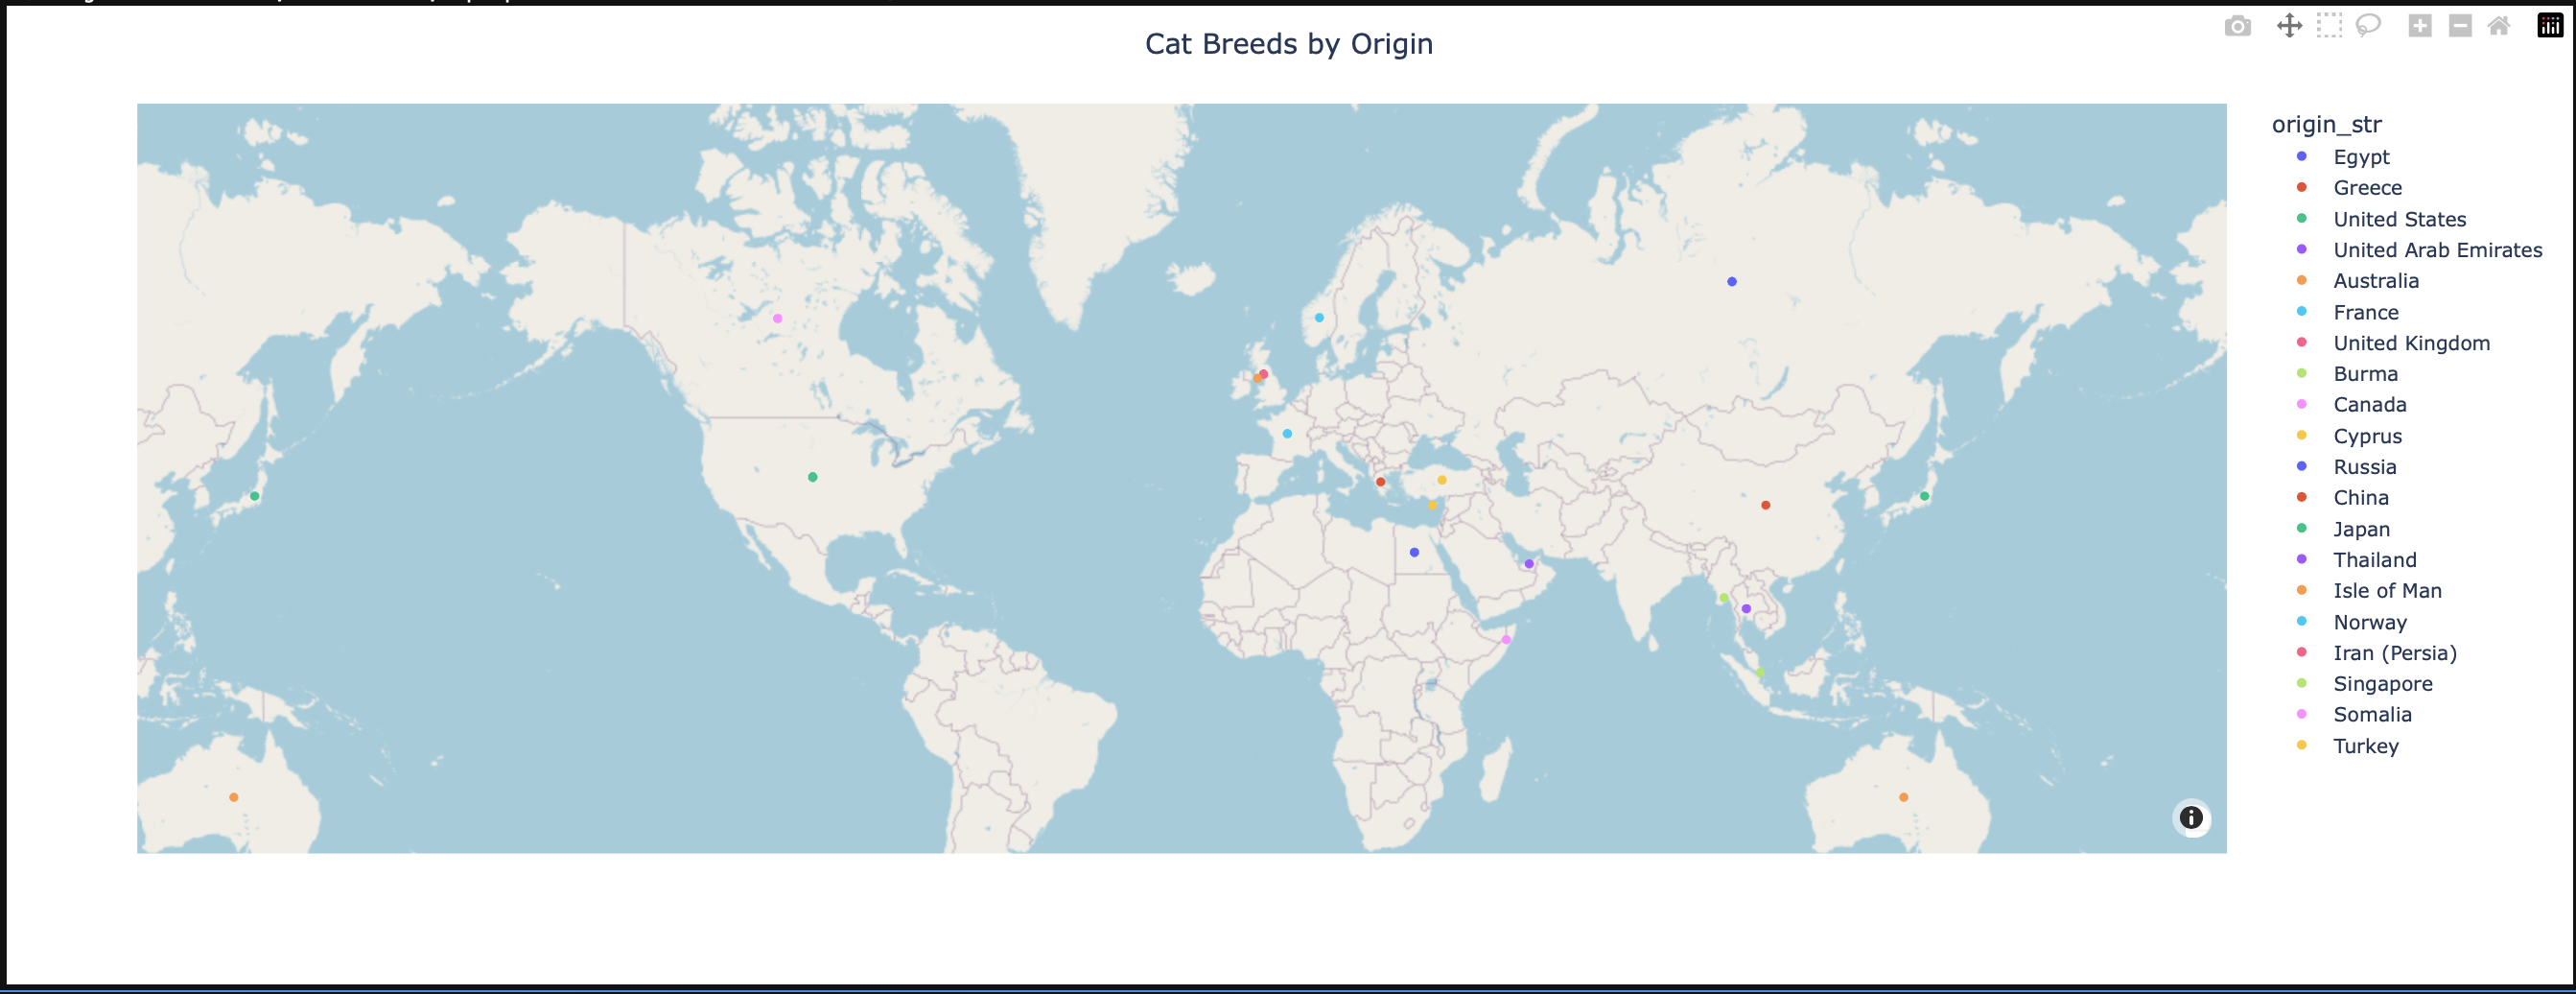 


## 🌎 Origin Distribution of Cat Breeds

This aggregation pipeline analyzes how cat breeds are distributed across different **countries of origin** in the `type_cats` collection.

### 🧩 Pipeline Breakdown

1. **Group by Origin**  
   Counts how many cat breeds are associated with each `origin`.

2. **Calculate Total**  
   Gathers all origin counts into an array and computes the overall total.

3. **Unwind Origins**  
   Flattens the array to work with individual origin entries.

4. **Project Final Output**  
   Displays:
   - `origin`
   - `count` of breeds from that origin
   - `proportion` relative to the total number of breeds

5. **Sort by Proportion**  
   Orders the results from the most common to the least represented origins.

### 📊 Result
A ranked list of cat breed origins, showing their **share of the total breed count**, useful for visualizations like bar or pie charts.


In [ ]:
import plotly.express as px

db = client["catsdb"]
collection = db["type_cats"]

pipeline = [
    # Group by "origin" and count the number of cats per origin
    {
        "$group": {
            "_id": "$origin",
            "count": {"$sum": 1}
        }
    },
    # Compute the total count and push each origin's count into an array
    {
        "$group": {
            "_id": None,
            "origins": {"$push": {"origin": "$_id", "count": "$count"}},
            "total": {"$sum": "$count"}
        }
    },
    # Unwind the origins array to get individual documents per origin
    {
        "$unwind": "$origins"
    },
    # Project the results: show the origin, count, and proportion (count divided by total)
    {
        "$project": {
            "_id": 0,
            "origin": "$origins.origin",
            "count": "$origins.count",
            "proportion": {"$divide": ["$origins.count", "$total"]}
        }
    },
    # Sort the results by proportion in descending order
    {
        "$sort": {"proportion": -1}
    },
    # Limit to top 10
    {
        "$limit": 10
    }
]

# Run the pipeline and convert the results to a list of dictionaries
data = list(collection.aggregate(pipeline))

# Convert the results into a pandas DataFrame
df = pd.DataFrame(data)

# Convert any list-type values in 'origin' to a comma-separated string
df['origin'] = df['origin'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Create an interactive treemap using Plotly Express
fig = px.treemap(
    df,
    path=['origin'],  # Use origin as the hierarchical path
    values='count',   # Size corresponds to the count
    title='Cats Distribution by Origin'
)

# Update traces to show percentage on the plot using the computed percentEntry
fig.update_traces(
    texttemplate='%{label}<br>%{value} cats<br>%{percentEntry:.1%}',
)

# Display the plot
fig.show()
    



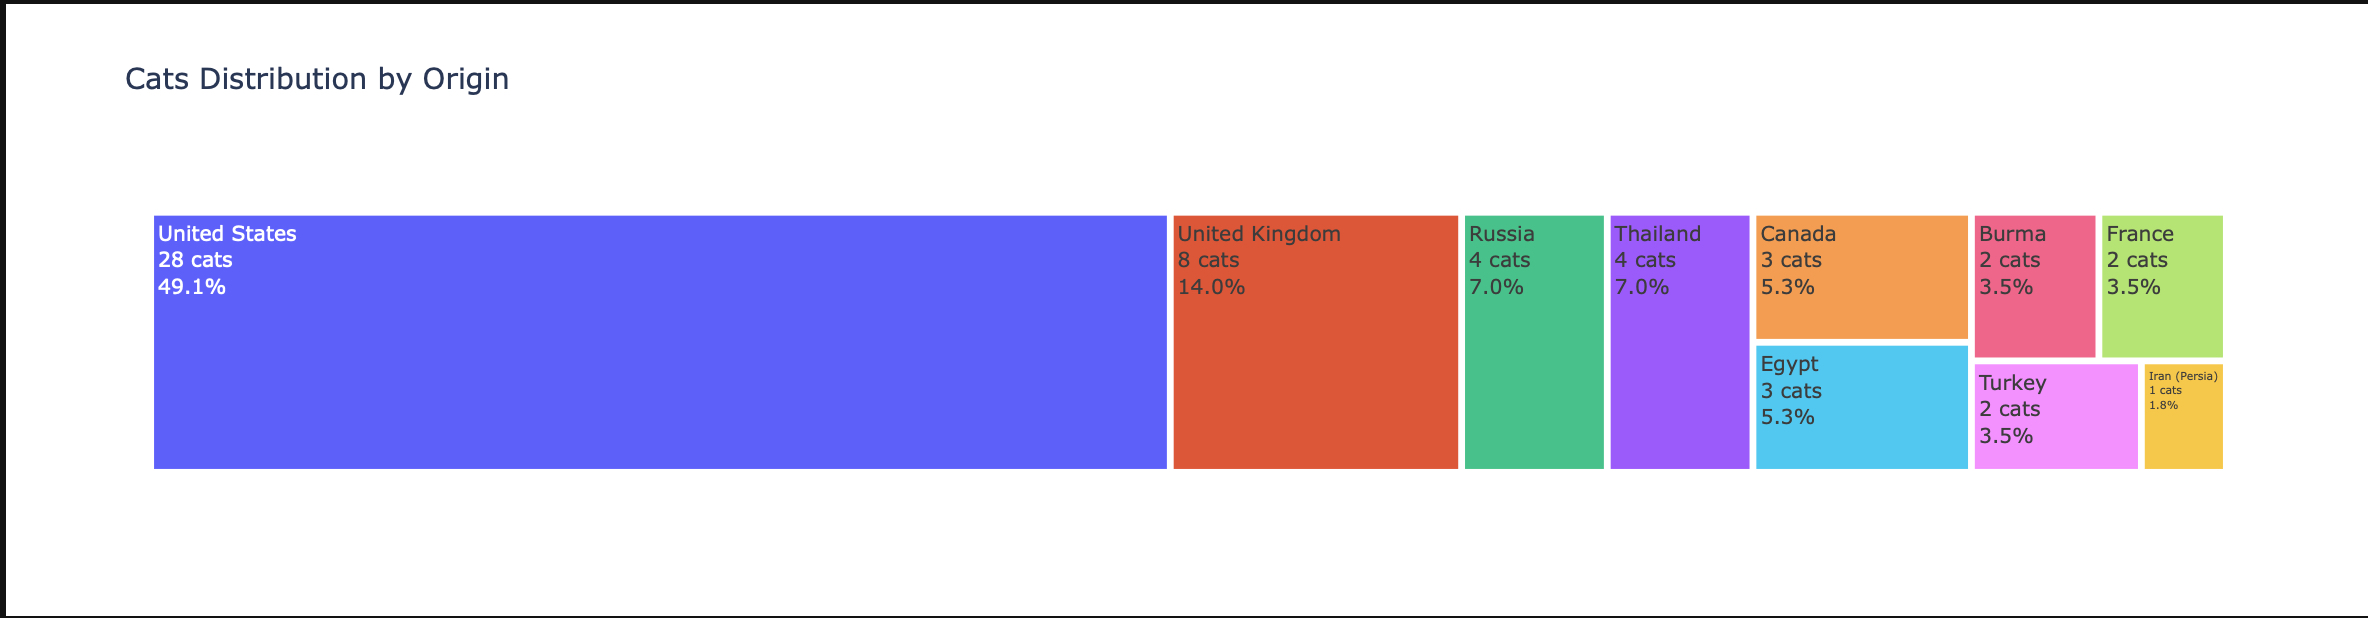

### 🐱🐶 Top 10 Longest-Living Cat and Dog Breeds

These pipelines to extract and analyze the average life span of cat and dog breeds.

- Extracts numeric values using regex
- Computes the **average lifespan** for each breed
- Sorts by longest-living breeds
- Displays the **Top 10 cat breeds** and **Top 10 dog breeds**

Useful for identifying breeds with the longest expected lifespans!


In [ ]:
# === CATS PIPELINE ===
cat_collection = client["catsdb"]["type_cats"]

cat_pipeline = [
    { "$project": {
        "breed": 1,
        "life_span": 1,
        "type_of_pet": { "$literal": "cat" }
    }},
    { "$addFields": {
        "digits": {
            "$regexFindAll": {
                "input": { "$replaceAll": { "input": "$life_span", "find": "to", "replacement": "-" } },
                "regex": "\\d+"
            }
        }
    }},
    { "$addFields": {
        "numbers": {
            "$map": {
                "input": "$digits",
                "as": "d",
                "in": { "$toInt": "$$d.match" }
            }
        }
    }},
    { "$addFields": {
        "avgLifeSpan": {
            "$cond": [
                { "$eq": [ { "$size": "$numbers" }, 2 ] },
                { "$floor": { "$avg": "$numbers" } },
                { "$arrayElemAt": [ "$numbers", 0 ] }
            ]
        }
    }},
    { "$sort": { "avgLifeSpan": -1 } },
    { "$limit": 10 }
]

top_10_cats = list(cat_collection.aggregate(cat_pipeline))


# === DOGS PIPELINE ===
dog_collection = client["dogsdb"]["type_dogs"]

dog_pipeline = [
    { "$project": {
        "breed": 1,
        "life_span": 1,
        "type_of_pet": { "$literal": "dog" }
    }},
    { "$addFields": {
        "digits": {
            "$regexFindAll": {
                "input": { "$replaceAll": { "input": "$life_span", "find": "to", "replacement": "-" } },
                "regex": "\\d+"
            }
        }
    }},
    { "$addFields": {
        "numbers": {
            "$map": {
                "input": "$digits",
                "as": "d",
                "in": { "$toInt": "$$d.match" }
            }
        }
    }},
    { "$addFields": {
        "avgLifeSpan": {
            "$cond": [
                { "$eq": [ { "$size": "$numbers" }, 2 ] },
                { "$floor": { "$avg": "$numbers" } },
                { "$arrayElemAt": [ "$numbers", 0 ] }
            ]
        }
    }},
    { "$sort": { "avgLifeSpan": -1 } },
    { "$limit": 10 }
]

top_10_dogs = list(dog_collection.aggregate(dog_pipeline))


# === COMBINE & DISPLAY ===
print("\n🐱 Top 10 Longest-Living Cats:")
for cat in top_10_cats:
    print(f"- {cat['breed']}: {cat['avgLifeSpan']} years (raw: {cat.get('life_span')})")

print("\n🐶 Top 10 Longest-Living Dogs:")
for dog in top_10_dogs:
    print(f"- {dog['breed']}: {dog['avgLifeSpan']} years (raw: {dog.get('life_span')})")

# OPTIONAL: Combine into one list if needed
# Combine both lists
all_top_pets = top_10_cats + top_10_dogs

# Convert to pandas DataFrame
df_top_pets = pd.DataFrame(all_top_pets)

# Reorder columns if desired
df_top_pets = df_top_pets[["type_of_pet", "breed", "avgLifeSpan", "life_span"]]

# Display the DataFrame
df_top_pets

### Conclusion

In this project, I explored the use of NoSQL databases and API integrations to efficiently store, retrieve, and analyze unstructured data. Using a NoSQL database gave me the flexibility to work with different types of data without being limited by a fixed schema, which was really useful for handling real world scenarios. I also connected to external APIs to bring in data dynamically, which added a real time component to the project. This combination of NoSQL and APIs helped me build a scalable and flexible data pipeline that could handle both live and batch data. Overall, this experience showed me how powerful and versatile these modern tools can be when used together.

### Learning

Throughout this project, I gained hands on experience working with NoSQL databases and saw firsthand how they offer more flexibility and scalability than traditional relational databases, especially when working with varied or evolving data. I also learned how to connect and interact with APIs to fetch and update data in real time, which added a dynamic layer to my analysis. This helped me understand how to combine external data sources with local storage in an efficient and practical way. Working through this process improved my ability to design and implement end to end data workflows. These are skills I know will be valuable in future data projects.


In [ ]:
!jupyter nbconvert final_project.ipynb --to html \
  --TagRemovePreprocessor.enabled=True \
  --TagRemovePreprocessor.remove_input_tags='["hide_input"]' \
  #--TagRemovePreprocessor.remove_single_output_tags='["remove_single_output"]'

In [ ]:
!jupyter nbconvert final_project.ipynb --to html \
  --TagRemovePreprocessor.enabled=True \
  --TagRemovePreprocessor.remove_single_output_tags='["remove_single_output"]'

In [ ]:
!jupyter nbconvert final_project.ipynb --to html --TagRemovePreprocessor.enabled=True \
--TagRemovePreprocessor.remove_input_tags='["remove_input"]' \
--TagRemovePreprocessor.remove_single_output_tags='["remove_single_output"]'